In [ ]:
! pip install bidict

In [29]:
import pandas as pd 
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from bidict import bidict

---
Multi-attention Multi-class model

In [30]:
pred1_df = pd.read_csv('../data/mc_attn_model.csv')
pred1_df.head()

,filename,label,target,probs
0,glide_text2img_annot000000037890.png,0,glide,"[9.9805e-01, 1.3359e-03, 1.6063e-04, 1.5244e-0..."
1,glide_text2img_annot000000056987.png,0,glide,"[9.9964e-01, 1.0463e-04, 1.4566e-05, 2.9963e-0..."
2,glide_text2img_annot000000038422.png,0,glide,"[9.9887e-01, 4.0164e-04, 4.3643e-04, 1.7388e-0..."
3,glide_text2img_annot000000039530.png,0,glide,"[9.9993e-01, 6.3471e-06, 4.9615e-05, 1.7614e-0..."
4,glide_text2img_annot000000052051.png,0,glide,"[9.9957e-01, 3.1307e-04, 6.2914e-05, 1.9339e-0..."


In [31]:
tag_dict = {'glide': 0,
            'gated': 1,
            'Taming': 2,
            'stylegan3': 3,
            'stylegan2': 4,
            'coco_standard': 5,
            'realffhq': 6}
tag_dict = bidict(tag_dict)

In [32]:
method_map = {
    'glide': 'Synth',
    'gated': 'Synth',
    'Taming': 'Synth',
    'stylegan3': 'Synth',
    'stylegan2': 'Synth',
    'coco_standard': 'Real',
    'realffhq': 'Real'
    }

In [33]:
pred1_df['pred_tag_text'] = pred1_df['label'].map(tag_dict.inverse)
pred1_df['target_ind'] = pred1_df['target'].map(tag_dict)
pred1_df['origin_pred'] = pred1_df['pred_tag_text'].map(method_map)
pred1_df['origin_target'] = pred1_df['target'].map(method_map)
pred1_df['probs'] = pred1_df['probs'].apply(lambda x: eval(x))
pred1_df.head()

,filename,label,target,probs,pred_tag_text,target_ind,origin_pred,origin_target
0,glide_text2img_annot000000037890.png,0,glide,"[0.99805, 0.0013359, 0.00016063, 1.5244e-06, 0...",glide,0,Synth,Synth
1,glide_text2img_annot000000056987.png,0,glide,"[0.99964, 0.00010463, 1.4566e-05, 2.9963e-06, ...",glide,0,Synth,Synth
2,glide_text2img_annot000000038422.png,0,glide,"[0.99887, 0.00040164, 0.00043643, 1.7388e-06, ...",glide,0,Synth,Synth
3,glide_text2img_annot000000039530.png,0,glide,"[0.99993, 6.3471e-06, 4.9615e-05, 1.7614e-07, ...",glide,0,Synth,Synth
4,glide_text2img_annot000000052051.png,0,glide,"[0.99957, 0.00031307, 6.2914e-05, 1.9339e-07, ...",glide,0,Synth,Synth


In [34]:
origin_map = {
    'Synth': 1,
    'Real': 0
}

pred1_df['origin_pred_ind'] = pred1_df['origin_pred'].map(origin_map)
pred1_df['origin_target_ind'] = pred1_df['origin_target'].map(origin_map)
pred1_df.head()

,filename,label,target,probs,pred_tag_text,target_ind,origin_pred,origin_target,origin_pred_ind,origin_target_ind
0,glide_text2img_annot000000037890.png,0,glide,"[0.99805, 0.0013359, 0.00016063, 1.5244e-06, 0...",glide,0,Synth,Synth,1,1
1,glide_text2img_annot000000056987.png,0,glide,"[0.99964, 0.00010463, 1.4566e-05, 2.9963e-06, ...",glide,0,Synth,Synth,1,1
2,glide_text2img_annot000000038422.png,0,glide,"[0.99887, 0.00040164, 0.00043643, 1.7388e-06, ...",glide,0,Synth,Synth,1,1
3,glide_text2img_annot000000039530.png,0,glide,"[0.99993, 6.3471e-06, 4.9615e-05, 1.7614e-07, ...",glide,0,Synth,Synth,1,1
4,glide_text2img_annot000000052051.png,0,glide,"[0.99957, 0.00031307, 6.2914e-05, 1.9339e-07, ...",glide,0,Synth,Synth,1,1


In [35]:
# multi-class result score
print(classification_report(y_true=pred1_df['target_ind'].values, y_pred=pred1_df['label'].values, target_names=list(tag_dict.keys())))

               precision    recall  f1-score   support

        glide       0.62      0.63      0.62       400
        gated       0.52      0.68      0.59       400
       Taming       0.92      0.90      0.91       699
    stylegan3       0.93      0.95      0.94       400
    stylegan2       0.96      0.81      0.88       400
coco_standard       0.92      0.88      0.90      1837
     realffhq       0.92      0.96      0.94       682

     accuracy                           0.85      4818
    macro avg       0.83      0.83      0.82      4818
 weighted avg       0.87      0.85      0.86      4818



In [36]:
# binary result score
print(classification_report(y_true=pred1_df['origin_target_ind'].values, y_pred=pred1_df['origin_pred_ind'].values, target_names=['Real', 'Synth']))

              precision    recall  f1-score   support

        Real       0.92      0.90      0.91      2519
       Synth       0.89      0.92      0.91      2299

    accuracy                           0.91      4818
   macro avg       0.91      0.91      0.91      4818
weighted avg       0.91      0.91      0.91      4818



In [43]:
sub_df = np.array([i for i in pred1_df.loc[pred1_df['target']=='glide', :]['probs'].values])
# print(sub_df)
avg_probs = np.mean(sub_df, axis=0)
print(avg_probs)

[6.53196972e-01 2.16946700e-01 3.07579738e-02 3.76976382e-04
 5.33038086e-03 9.30600590e-02 3.30171154e-04]


Text(0.5, 1.0, 'Glide Avg. Prediction probability')

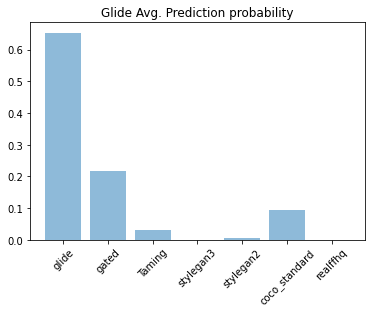

In [53]:
import matplotlib.pyplot as plt 
classes = list(tag_dict.keys())
plt.bar(classes, avg_probs, align='center', alpha=0.5)
plt.xticks(rotation=45)
plt.title("Glide Avg. Prediction probability")

Text(0.5, 1.0, 'Refined Confusion Matrix')

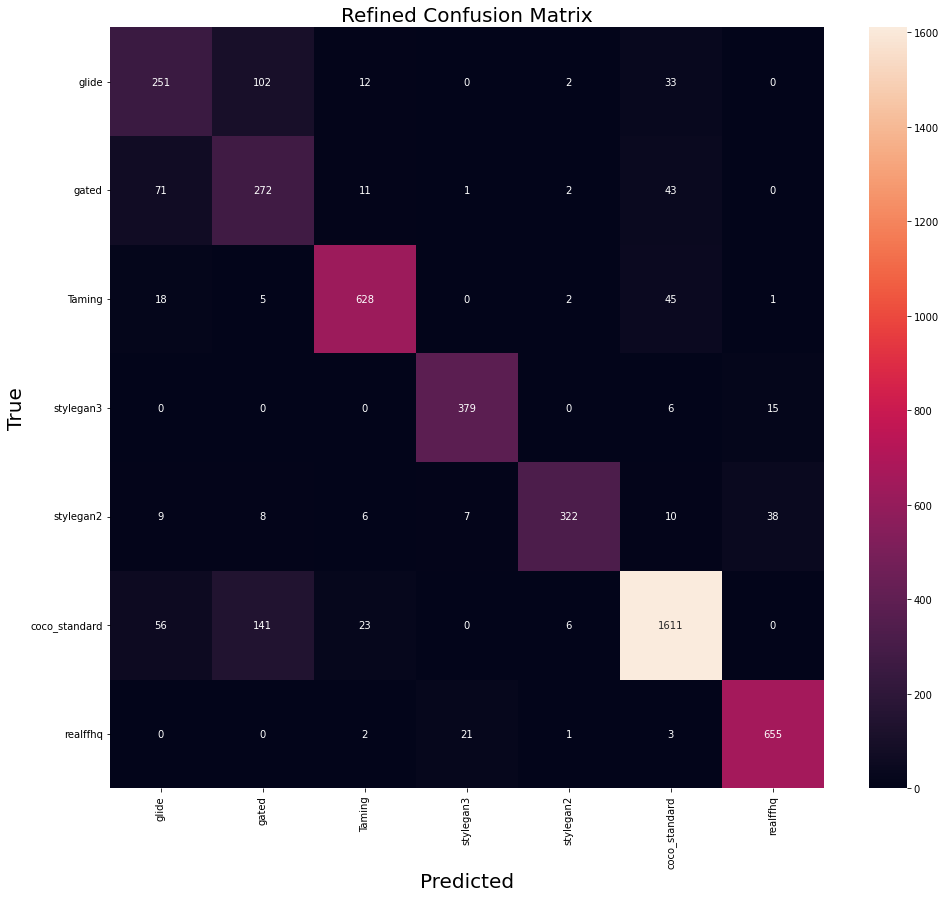

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = pred1_df['target_ind'].values 
y_pred = pred1_df['label'].values
cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
class_names = classes

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)


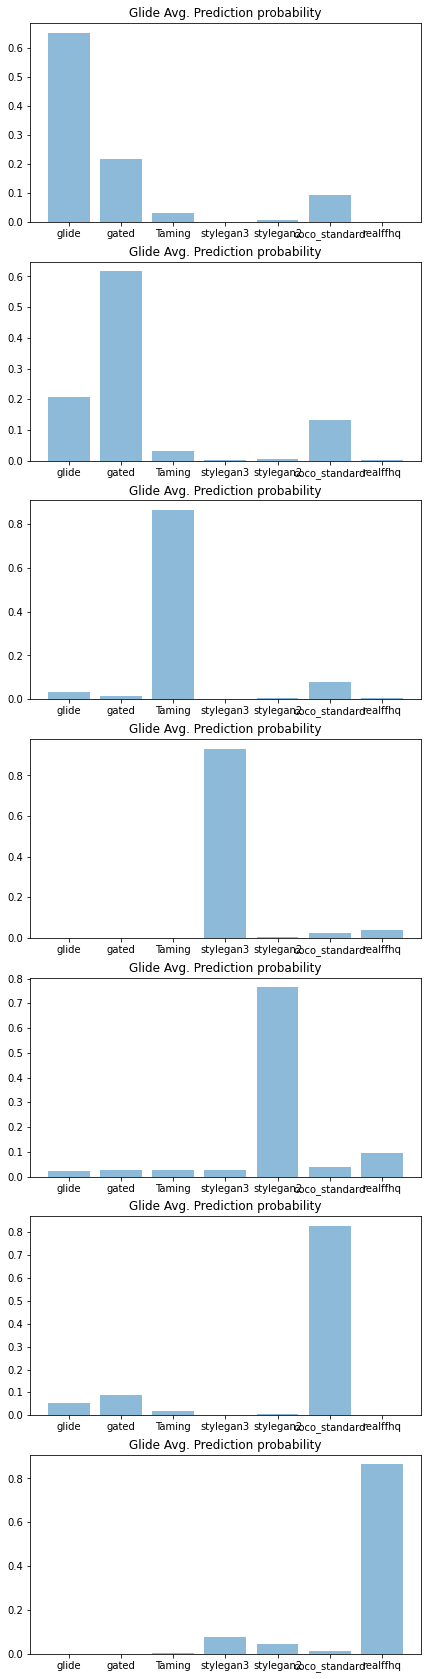

In [66]:
classes = list(tag_dict.keys())
fig, ax = plt.subplots(len(classes), 1, figsize=(7, 30))
for n,i in tag_dict.items():
    sub_df = np.array([i for i in pred1_df.loc[pred1_df['target']==n, :]['probs'].values])
    avg_probs = np.mean(sub_df, axis=0)
    axx = ax[i]
    axx.bar(classes, avg_probs, align='center', alpha=0.5)
    # axx.set_xticklabels(rotation=45)
    axx.set_title("Glide Avg. Prediction probability")

In [72]:
ones_ind = [0,1,2,3,4]
zeros_ind = [5,6]
prob_vector = np.array([i for i in pred1_df.loc[:, :]['probs'].values])
ones_prob = np.sum(prob_vector[:, ones_ind], axis=1)[..., np.newaxis]
zeros_prob = np.sum(prob_vector[:, zeros_ind], axis=1)[..., np.newaxis]
full_probs = np.hstack((zeros_prob, ones_prob))
pred_class = np.argmax(full_probs, axis=1)
pred_class.shape

(4818,)

In [75]:
print(classification_report(y_true=pred1_df['origin_target_ind'].values, y_pred=pred_class))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2519
           1       0.88      0.93      0.90      2299

    accuracy                           0.90      4818
   macro avg       0.90      0.91      0.90      4818
weighted avg       0.91      0.90      0.90      4818

